# Home Assignment No. 2
# Part 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


# Part One

## Task 1 - Bayesian ML (2 pts)

In this task, you will be asked to create probabilistic models based on some predefined data and make predictions. 
Remember that the Bayesian approach to modelling is based on the following notions:

Given objects, that we use for training:
* $\theta$ - vector of parameters of the model
* $D$ - dataset

The underlying nature of these objects can be described:
* $p(\theta)$ - prior distribution
* $p(D | \theta)$ - posterior distribution

What we would like to achieve:
* posterior distribution $p(\theta | D)$:
$$
p(\theta | D) = \frac{p(D | \theta) p(\theta)}{p(D)} \propto p(D | \theta) p(\theta).
$$
* Evidence $p(D)$;
* Predictions $p(D_{new} | D)$:
$$
p(D_{new} | D) = \int p(D_{new} | \theta) p(\theta | D) d\theta.
$$

So, in other words, there are two main steps to Bayesian modeling, which will take place in this task:

1) choosing the best probabilistic model for observed data, i.e. specifying proper $p(\theta)$ and $p(D | \theta)$

2) computing the posterior distribution $p(\theta | D)$;

These two steps are exactly what you will be asked to do in the next subtasks.

One of the most widely used libraries in probabilistic programming is PyMC3, which transforms a lot of the math (such as Variational Inference) into simple functions. For those of you unfamiliar with PyMC3, here are the links to the tutorials, similar to what you should do in this task: https://docs.pymc.io/notebooks/getting_started (getting familiar with pymc3 library and its capabilities); https://docs.pymc.io/notebooks/marginalized_gaussian_mixture_model.html (Mixture models, which will be useful in one of the subtasks); https://docs.pymc.io/api/distributions.html (a lot of distributions available in PyMC3).

In [1]:
import numpy as np
from numpy import random, sum as nsum, concatenate
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16

In [2]:
# these commands have been tested on Google Collab. If you are using 
# jupyter locally and this combination of commands is not working, try manually downloading pymc3, 
# depending on your OS: https://github.com/pymc-devs/pymc3#installation 
 
! pip install pymc3==3.6
! pip install arviz==0.4.0
! pip install pandas==0.24.2

### Task 1.1 (1 pt.)
The first subtask is quite simple and designed to get you familiar with PyMC3. You will deal with a coin flip scenario: you suspect that there is some external factor, which you can control, that influences the outcome of your coin-flip. In order to check if your suspicions are true, you will conduct a simple A/B test, i.e. create a control and test group, for which the external factor will and will not be present, respectively. You will need to construct the probability model using PyMC3 to answer the question of its influence on the outcome.

To achieve that, please follow the completed code and the following plan:

1) Analyze the data - print out the mean for both groups, are they similar?

2) Built the probabilistic models for both groups: 

  1. What type of distribution does the likelihood of the coin-flip outcomes follow? What type of distribution do its parameters follow? Is there any prior knowledge about the parameters that we can use?

3) Sample from the modeled posterior distributions and analyze the results: after sampling, use `traceplot` function to plot the distributions of the model's parameters.

In order to achieve your point for this sub-task:

1) fill in the missing code

2) answer the questions in the devoted cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influences the results of our coin-flips?

**NOTE**: when building the model you may find that a couple of different (or one being the special case of the other) distributions can fit, for example, the parameter distribution. You can choose whatever you prefer, the task will be assessed by the plotted results and your interpretation of them.
 

In [3]:
import theano
import theano.tensor as T 
import pymc3 as pm

In [4]:
#where 0 is test group and 1 is a control group
control_flips = [0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,
                   1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,
                   0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
test_flips = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,
              0,0,0,0,1,0,0,0,0,1,0,0,0,0]

1) Analyze the data - print out the mean for both groups, are they similar?

In [5]:
### BEGIN SOLUTION (do not delete this comment!)

mu1 = np.mean(control_flips)
mu2 = np.mean(test_flips)
print('1st group mean =', mu1)
print('2nd group mean =', mu2)

### END SOLUTION (do not delete this comment!)

1st group mean = 0.17
2nd group mean = 0.15


Built the probabalistic models for both groups.

In [6]:
model_flips = pm.Model()
with model_flips:
    ### BEGIN SOLUTION (do not delete this comment!)

    # variables for the model
    p_c = pm.Normal("p_c", mu = mu1, sd=1) # unobserved random variable (RV)
    obs1 = pm.Normal("obs1", mu=p_c, sd=1, observed = control_flips) # observed RV
    p_t = pm.Normal("p_t", mu = mu2, sd=1) # unobserved RV
    obs2 = pm.Normal("obs2", mu=p_t, sd=1, observed = test_flips) # observed RV
    
    ### END SOLUTION (do not delete this comment!)

Sample from the modelled posterior distributions and analyze the results (sampling is already filled in for you). To analyze the results: use pymc3's`traceplot` function to plot the distributions of the model's parameters; use pymc3's `summary` to have a look at the result in more detail.

In [7]:
#sampling from the model
with model_flips:
    samples_flips = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p_t, p_c]
100%|██████████| 2000/2000 [00:01<00:00, 1609.89it/s]


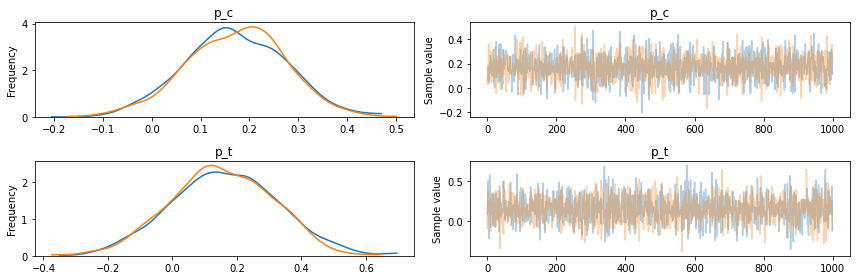

In [8]:
### BEGIN SOLUTION (do not delete this comment!)

import arviz as az

# plot distributions of the model's parameters
with model_flips:
    pm.traceplot(samples_flips)
    
### END SOLUTION (do not delete this comment!)

In [9]:
### BEGIN SOLUTION (do not delete this comment!)

az.summary(samples_flips) # get summary about experiments

### END SOLUTION (do not delete this comment!)

mean     sd  mcse_mean  mcse_sd  hpd_3%  hpd_97%  ess_mean  ess_sd  \
p_c  0.170  0.101      0.002    0.002  -0.037    0.345    2101.0  1878.0   
p_t  0.156  0.161      0.004    0.003  -0.155    0.439    2025.0  1300.0   

     ess_bulk  ess_tail  r_hat  
p_c    2100.0    1657.0    1.0  
p_t    2029.0    1376.0    1.0

**Answer the questions in the following cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influeneces the results of our coin-flips?**

*BEGIN SOLUTION (do not delete this comment!)* 

* The control and test distributions have different divisions and different mean values. Therefore, we can say that there is an additional influence of some factor on the test group, leading to other distribution parameters.

*END SOLUTION (do not delete this comment!)*

### Task 1.2 (1 pt.)

Now that you have understood the basic PyMC3 pipeline, let's try to model more complex data in a similar manner: 

1) load file sample_bml.csv - this file contains 1000 samples of some data with two labels '0' and '1' (the first column represents the labels).

2) plot the histograms of both groups of data in one figure 

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

4) build the model 

    1) What are the types of distributions you would use for each of the presented group of data? 
    
    2) What about the parameters of these distributions? 
    
    3) What distribution is the resulting likelihood follows?
 
5) sample from the resulting model

6) plot the trace - use pymc3's `traceplot`

7) sample from the posterior predictive distribution of the model - use pymc3's `sample_posterior_predictive`

8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

9) analyzing the results that you have achieved in 7) and 9), answer the questions: assess the success of your model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?

1) load file sample_bml.csv 

In [10]:
### BEGIN SOLUTION (do not delete this comment!)

sample_bml = pd.read_csv('sample_bml.csv', delimiter=' ')

### END SOLUTION (do not delete this comment!)

2) plot the histogramms of both groups of data in one figure

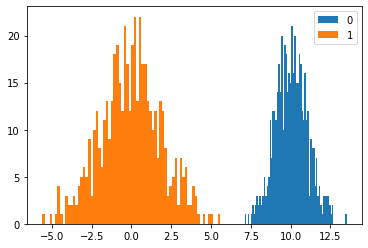

In [11]:
### BEGIN SOLUTION (do not delete this comment!)

lables = sample_bml[sample_bml.columns[0]] # get lables
samples = sample_bml[sample_bml.columns[1]] # get samples

sample_zeros = sample_bml.loc[lables == 0] # zero lables
sample_ones = sample_bml.loc[lables == 1] # ones lables

val_zeros = sample_zeros[sample_zeros.columns[1]]
val_ones = sample_ones[sample_ones.columns[1]]

bins = 70
plt.figure(figsize=(6,4)) # plot figure
plt.hist(val_zeros, bins, label='0')
plt.hist(val_ones, bins, label='1')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### END SOLUTION (do not delete this comment!)

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

*BEGIN SOLUTION (do not delete this comment!)*

* In front of me are 2 histograms corresponding to the two proposed control groups labeled as 1 and 0. The horizontal axis corresponds to the accepted value, and the vertical axis is the frequency of occurrence.it can be seen that the data with 1 label takes values in the vicinity of 0, and with the label 0 in the vicinity of 10. The spread of values in group 1 is wider (almost twise) than in group 0.

*END SOLUTION (do not delete this comment!)*

4) build the model 

In [12]:
mixture_model = pm.Model()

with mixture_model:
  ### BEGIN SOLUTION (do not delete this comment!)

    # calculate mean and std values
    mean1 = np.mean(val_zeros)
    std1 = np.std(val_zeros)
    mean2 = np.mean(val_ones)
    std2 = np.std(val_ones)

    # generate gistributions
    zeros = pm.Normal("zeros", mu = mean1, sd = std1) # unobserved random variable (RV)
    ones = pm.Normal("ones", mu = mean2, sd = std2) # observed RV

  ### END SOLUTION (do not delete this comment!)

5) sample from the resulting model

In [13]:
with mixture_model:
    step = pm.NUTS()
    nuts_trace = pm.sample(2000, step)

Sequential sampling (2 chains in 1 job)
NUTS: [ones, zeros]
100%|██████████| 2500/2500 [00:01<00:00, 1808.35it/s]


6) plot the trace - use pymc3's traceplot

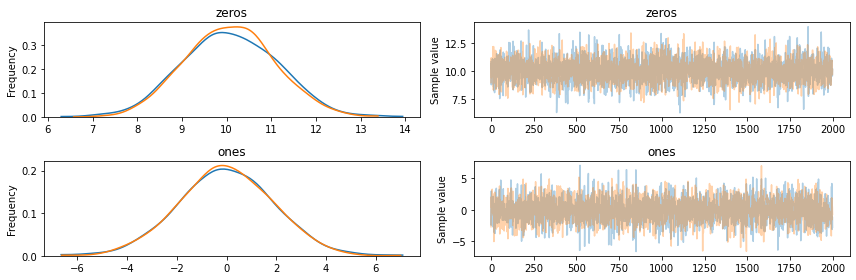

In [14]:
### BEGIN SOLUTION (do not delete this comment!)
with model_flips:
    pm.traceplot(nuts_trace)
### END SOLUTION (do not delete this comment!)

7) sample from the posterior predictive distribution of the model - use pymc3's sample_posterior_predictive



In [15]:
### BEGIN SOLUTION (do not delete this comment!)

post_pred_dist = pm.sample_posterior_predictive(nuts_trace, model=mixture_model, vars=[mixture_model['zeros'], mixture_model['ones']])
  
### END SOLUTION (do not delete this comment!)

100%|██████████| 4000/4000 [00:00<00:00, 32374.57it/s]


8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

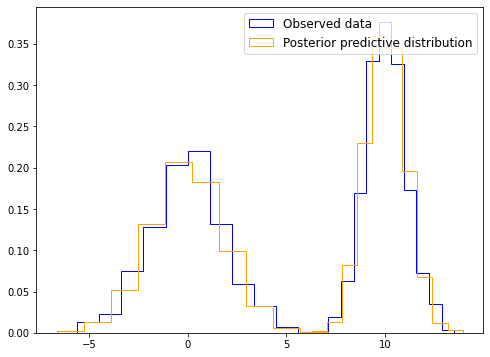

In [16]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(8,6))
plt.hist(val_zeros, color = 'blue', histtype='step', label='Observed data', density = True)
plt.hist(val_ones, color = 'blue', histtype='step', density = True)

plt.hist(post_pred_dist['zeros'], color = 'orange', histtype='step', label='Posterior predictive distribution', density = True)
plt.hist(post_pred_dist['ones'], color = 'orange', histtype='step', density = True)

plt.legend(loc='upper right', fontsize=12)

### END SOLUTION (do not delete this comment!)

**Answer the questions: asses the success of you model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?**

*BEGIN SOLUTION (do not delete this comment!)*

* The model turned out to be quite successful, despite small deviations.
* The model cannot exactly replicate the original value, because to achieve this accuracy, a huge amount of data is needed to construct.
* To improve accuracy, you can, for example, significantly increase the sample dataset size.

*END SOLUTION (do not delete this comment!)*

## Task 2 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [17]:
! pip install GPy==1.9.9

     |████████████████████████████████| 1.0MB 6.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2626978 sha256=fa8e1dd8279a908e62abfd32fb84312e15811df26bf26a88119b97587bcc8c94
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp37-none-any.whl size=102552 sha256=a070eb0f3ac383ce4d55e575b4cae1305fe1f4410d2c20e3e0d08c1eac1cf3ed
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [20]:
data.dropna(inplace=True)

In [21]:
y = np.array(data.values)
X = np.array(data.index)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [23]:
### BEGIN SOLUTION (do not delete this comment!)

scaler = StandardScaler() # define scaler
y_train_scaled = scaler.fit_transform(y_train) # scale train set
y_test_scaled = scaler.fit_transform(y_test) # scale test set

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

Text(0, 0.5, 'Electricity consumption')

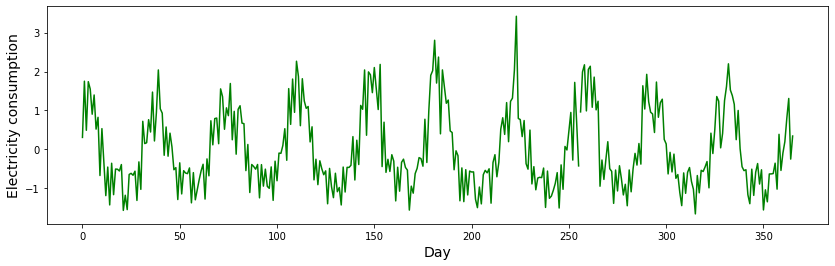

In [24]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(14,4))
plt.plot(X_test, y_test_scaled, color ='g')
plt.plot(X_train, y_train_scaled, color ='g')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Day', fontsize = 14)
plt.ylabel('Electricity consumption', fontsize = 14)
  
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

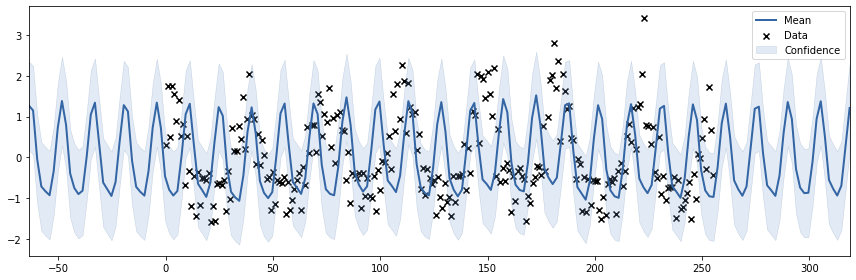

In [25]:
### BEGIN SOLUTION (do not delete this comment!)

from GPy.models import GPRegression
from GPy.kern import RBF, Poly, PeriodicExponential, StdPeriodic #, White, Linear,PeriodicExponential
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator

exit = 0
for variance in np.linspace(1, 5, 10):
    if exit == 1:
        break
    for lengthscale in np.linspace(2, 10, 5):
        if exit == 1:
            break
        # create kernel with current parameters
        kernel = RBF(1, variance = variance, lengthscale = lengthscale) + Poly(1, variance = variance) + StdPeriodic(1)
        model = GPRegression(X_train, y_train_scaled, kernel) # create model
        model.optimize(optimizer = 'lbfgs') # optimize
        score = r2_score(y_test_scaled, model.predict(X_test)[0]) # find score
        if score > 0.7:
            # if score is enough
            best_var = variance
            best_length = lengthscale
            exit = 1

# create model with good parameters
kernel = RBF(1, variance = best_var, lengthscale = best_length) + Poly(1, variance = best_var) + StdPeriodic(1)
model = GPRegression(X_train, y_train_scaled, kernel)
model.optimize(optimizer = 'lbfgs')

# show graph
model.plot(figsize=(12,4))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc='upper right', prop={'size': 10})

### END SOLUTION (do not delete this comment!)

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

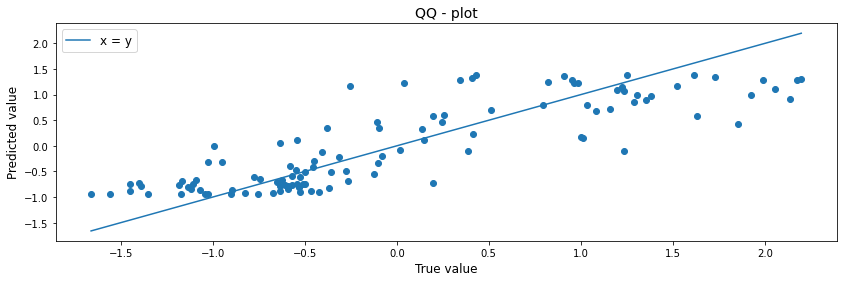

In [26]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(14,4))

# plot y=x line
start, end = (min(y_test_scaled), max(y_test_scaled))
x = np.linspace(start, end, y_test_scaled.shape[0])
y = np.linspace(start, end, y_test_scaled.shape[0])
plt.plot(x, y, label = 'x = y')

# plot predicted vs true
plt.scatter(y_test_scaled, model.predict(X_test)[0])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('True value', fontsize = 12)
plt.ylabel('Predicted value', fontsize = 12)
plt.title('QQ - plot', fontsize=14)
plt.legend(loc='upper left', prop={'size': 12})
plt.show()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [27]:
### BEGIN SOLUTION (do not delete this comment!)

# calculate r2 score using true and predicted data
r2 = r2_score(y_test_scaled, model.predict(X_test)[0])
print("r2 score: ", np.round(r2,3))

### END SOLUTION (do not delete this comment!)

r2 score:  0.718


## Task 3 - MNIST, kMNIST component analysis and manifold learning. (4 pts.)

### Task 3.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

100%|██████████| 10/10 [01:55<00:00, 11.59s/it]


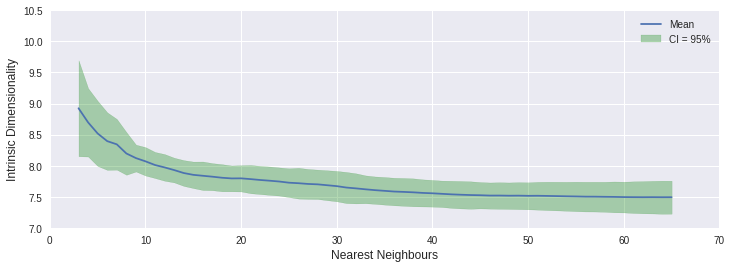

In [29]:
### BEGIN SOLUTION (do not delete this comment!)

# the code from proposed link

from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

intdim_k_repeated = np.array(repeated(intrinsic_dim_scale_interval, data, mode='bootstrap', nb_iter=10, random_state=42, verbose=1,  k1=1, k2=65))

import scipy

mean_val = np.mean(intdim_k_repeated[:,2:], axis=0) # calc mean value
var_val = np.var(intdim_k_repeated[:,2:], axis=0) # calc variation
intdim_interval = scipy.stats.norm(mean_val, np.sqrt(np.array(var_val))).interval(0.95) # estimate interval

plt.figure(figsize=(12,4))
plt.style.use('seaborn')
plt.plot(np.arange(3, 66), mean_val, label='Mean')
plt.fill_between(np.arange(3, 66), *intdim_interval, alpha=0.3, label='CI = 95%', color = 'green')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlim(0,70)
plt.ylim(7,10.5)
plt.xlabel('Nearest Neighbours', fontsize = 12)
plt.ylabel('Intrinsic Dimensionality', fontsize = 12)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()
plt.style.use('default')

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

100%|██████████| 65/65 [00:01<00:00, 32.99it/s]


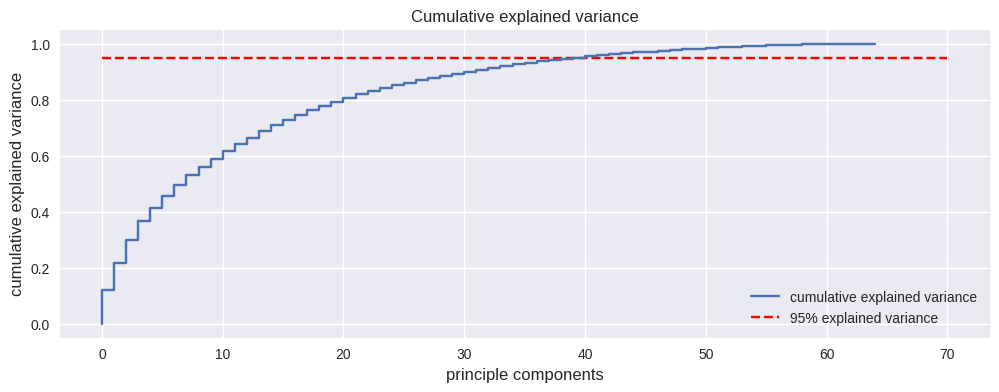

In [30]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.decomposition import PCA

components = np.arange(65)

exp_var = []
for n_comp in tqdm(components):
    pca = PCA(n_components = n_comp)
    pca.fit(data)
    exp_var.append(pca.explained_variance_ratio_.sum())

plt.figure(figsize=(12,4))
plt.style.use('seaborn')
plt.hlines(0.95, 0, 70, color = 'r', linestyle = '--', label = '95% explained variance')
plt.step(components, exp_var, label = 'cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=12)
plt.xlabel('principle components', fontsize=12)
plt.ylabel('cumulative explained variance', fontsize=12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc='lower right', prop={'size': 10})
plt.show()
plt.style.use('default')

### END SOLUTION (do not delete this comment!)

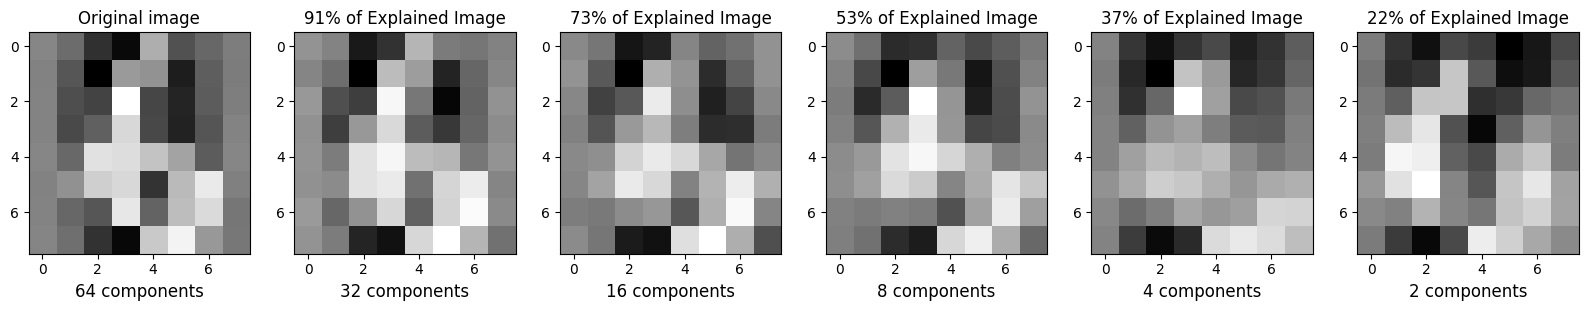

In [31]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

n_components = [64, 32, 16, 8, 4, 2]
percent = [int(np.round(exp_var[i], 2) * 100) for i in n_components]

titles = ['Original image',
          str(percent[1]) + '% of Explained Image',
          str(percent[2]) + '% of Explained Image',
          str(percent[3]) + '% of Explained Image',
          str(percent[4]) + '% of Explained Image',
          str(percent[5]) + '% of Explained Image']

fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for ax, n_comp, title in zip(axs.ravel(), n_components, titles):
    pca = PCA(n_components = n_comp) # create PCA
    pca.fit(data) # fit PCA on the data
    projection = pca.transform(data[34].reshape(1, -1)) # get projection for 34th image
    image_decomposed = pca.inverse_transform(projection) # restore image
    # print decomposed images
    ax.set_title(title, fontsize = 12)
    ax.set_xlabel(str(n_comp) + ' components', fontsize = 12)
    ax.imshow(image_decomposed.reshape(8, 8), cmap = 'gist_gray', interpolation='nearest')
    
### END SOLUTION (do not delete this comment!)

### Task 3.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [32]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [33]:
### BEGIN SOLUTION (do not delete this comment!)

import warnings
warnings.filterwarnings("ignore")

intr_dim_components = 8
iters = 1000
std = []
mean = []
scores = [[],[],[]]

methods = [PCA(n_components = intr_dim_components, random_state = 0),
          FastICA(n_components = intr_dim_components, max_iter = iters),
          Isomap(n_components = intr_dim_components, max_iter = iters, n_jobs =-1)]

lr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = iters)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

for i in range(3):
    current_data = methods[i].fit_transform(data)
    for train_idx, test_idx in rkf.split(current_data):
        # get train and test values
        X_train = current_data[train_idx] 
        X_test = current_data[test_idx]
        y_train = dg.target[train_idx]
        y_test = dg.target[test_idx]

        # fit logistic regression
        lr.fit(X_train, y_train)
        # calculate score
        score = accuracy_score(y_test,lr.predict(X_test))
        scores[i].append(score)
    std.append(np.std(scores[i]))
    mean.append(np.mean(scores[i]))

print('      PCA: mean accuracy = ' + str(np.round(mean[0],3)) + '; std =' + str(np.round(std[0],3)))
print('PCFastICA: mean accuracy = ' + str(np.round(mean[1],3)) + '; std =' + str(np.round(std[1],3)))
print('   Isomap: mean accuracy = ' + str(np.round(mean[2],3)) + '; std =' + str(np.round(std[2],3)))

### END SOLUTION (do not delete this comment!)

      PCA: mean accuracy = 0.875; std =0.02
PCFastICA: mean accuracy = 0.715; std =0.038
   Isomap: mean accuracy = 0.954; std =0.013


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [34]:
### BEGIN SOLUTION (do not delete this comment!)

from scipy.stats import ttest_ind

_, p_val_1 = ttest_ind(scores[0], scores[2])
_, p_val_2 = ttest_ind(scores[1], scores[2])

print('Statistically significant improvement of Isomap over PCA: p-value ', p_val_1)
print('Statistically significant improvement of Isomap over ICA: p-value ', p_val_2)

### END SOLUTION (do not delete this comment!)

Statistically significant improvement of Isomap over PCA: p-value  4.1539183282085895e-13
Statistically significant improvement of Isomap over ICA: p-value  2.0327536991701284e-19


3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

* The goal of this task is to compare linear DR methods (PCA and ICA) and no-linear (Isomap). PCA uses first n largest singular values. ICA tries represent data as independent sub-elements. Isomap uses non-linear trasformations over data to keep ditances between points equal to each other in the manifold.
Isomap has shown better results, because it's waoks better with huge and hard non-linear data structures.

*END SOLUTION (do not delete this comment!)*

### Task 3.3. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [36]:
# ### BEGIN SOLUTION (do not delete this comment!)

# just classifier
clf = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print('Accuracy score without DR: ' + str(acc))

 # I've trired to use all range, but calculations takes too much time.
 # So, I've chosen the best option (60 components)
 
 # classifier with DR
# comp_range = np.linspace(30,90,10)
comp_range = [60]
scores = []
clf = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
for i in comp_range:
    pca = PCA(n_components = i, random_state = 0)
    x_train_pca, x_test_pca = pca.fit_transform(x_train), pca.transform(x_test)
    clf.fit(x_train_pca, y_train)
    score = clf.score(x_test_pca, y_test)
    scores.append(score)

max_score_index = scores.index(max(scores))
n_comp_max_acc = comp_range[max_score_index]

print('Achieved accurecy:', str(max(scores)))
print('N_components_PCA:', str(comp_range[max_score_index]))

### END SOLUTION (do not delete this comment!)

Accuracy score without DR: 0.9133
Achieved accurecy: 0.9329
N_components_PCA: 60


## Task 4 - Clustering (2 pts.)

### Task 4.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [37]:
import numpy as np

True number of clusters is 15


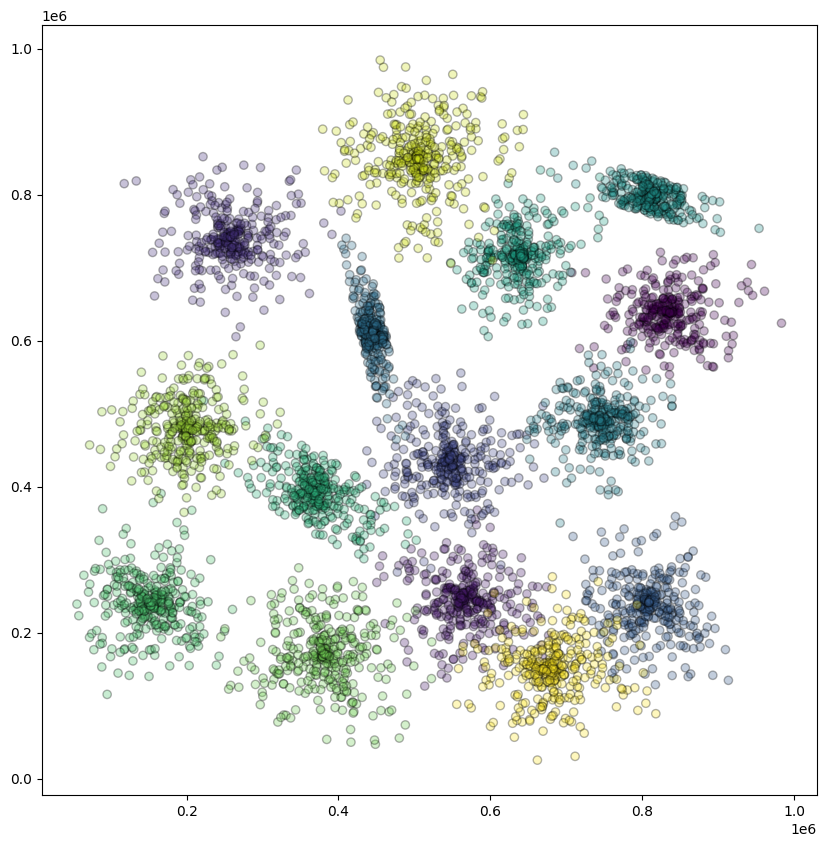

In [38]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [40]:
## BEGIN SOLUTION (do not delete this comment!)

from sklearn.cluster import Birch, AgglomerativeClustering

true_number_of_clusters = int(np.max(labels))

grid = [
        {'method':['KMeans'],'init': ['k-means++', 'random'], 'n_init': [2, 4, 8, 16, 32]},
        {'method':['GaussianMixture'],'covariance_type': ['full','tied','diag','spherical'], 'reg_covar': [1e-7, 1e-6, 1e-5]},
        {'method':['Birch'],'threshold': [0.1,0.2,0.4,0.6,0.8,1.0], 'branching_factor': [4, 8, 16, 32]},
        {'method':['AgglomerativeClustering'],'affinity': ['euclidean', 'manhattan', 'cosine'], 'linkage': [ 'complete', 'average', 'single']}
        ]

kmeans_list = []
gmm_list = []
birch_list = []
aggc_list = []

models = ['KMeans', 'GaussianMixture', 'Birch', 'AgglomerativeClustering']

def get_scores(pts, lbls, prds, parameters):
    SIL = silhouette_score(pts, prds) # calculate silhouette_score
    MI = mutual_info_score(lbls, prds) # calculate mutual_info_score
    return SIL, MI, parameters

# to find best params for each score type
def find_best(input_list):
    best_sil = 0
    best_sil_param = 0
    best_mi = 0
    best_mi_param = 0
    for combination in input_list:

        if combination[0] > best_sil:
            best_sil = combination[0]
            best_sil_param = combination[2]

        if combination[1] > best_mi:
            best_mi = combination[1]
            best_mi_param = combination[2]
    print('   silhouette_score = ', best_sil)
    print('   parameters', best_sil_param)
    print()
    print('   mutual_info_score = ', best_mi)
    print('   parameters', best_mi_param)
    print()
    return None

for i in range(len(list(ParameterGrid(grid)))):

    current_params = list(ParameterGrid(grid))[i]
    current_method = current_params['method']

    if current_method == models[0]:
        km = KMeans(n_clusters = true_number_of_clusters, random_state = 0, n_jobs=-1)
        km.set_params(init=current_params['init'], n_init=current_params['n_init'])
        km.fit(points)
        preds_current = km.labels_
        kmeans_list.append(get_scores(points, labels, preds_current, current_params))

    elif current_method == models[1]:
        gm = GaussianMixture(n_components = true_number_of_clusters, random_state = 0)
        gm.set_params(covariance_type=current_params['covariance_type'], reg_covar=current_params['reg_covar'])
        gm.fit(points)
        preds_current = gm.predict(points)
        gmm_list.append(get_scores(points, labels, preds_current, current_params))

    elif current_method == models[2]:
        br = Birch(n_clusters = true_number_of_clusters, copy = False)
        br.set_params(threshold=current_params['threshold'], branching_factor=current_params['branching_factor'])
        br.fit(points)
        preds_current = br.labels_
        birch_list.append(get_scores(points, labels, preds_current, current_params))

    elif current_method == models[3]:
        ac = AgglomerativeClustering(n_clusters = true_number_of_clusters)
        ac.set_params(affinity=current_params['affinity'], linkage=current_params['linkage'])
        ac.fit(points)
        preds_current = ac.labels_
        aggc_list.append(get_scores(points, labels, preds_current, current_params))

print('Parameters for best perfomance')
print()
print(models[0])
find_best(kmeans_list)
print(models[1])
find_best(gmm_list)
print(models[2])
find_best(birch_list)
print(models[3])
find_best(aggc_list)

### END SOLUTION (do not delete this comment!)

Parameters for best perfomance

KMeans
   silhouette_score =  0.6261563743783776
   parameters {'init': 'k-means++', 'method': 'KMeans', 'n_init': 4}

   mutual_info_score =  2.5614788236303343
   parameters {'init': 'random', 'method': 'KMeans', 'n_init': 4}

GaussianMixture
   silhouette_score =  0.5919737585882833
   parameters {'covariance_type': 'tied', 'method': 'GaussianMixture', 'reg_covar': 1e-07}

   mutual_info_score =  2.4669425694635962
   parameters {'covariance_type': 'full', 'method': 'GaussianMixture', 'reg_covar': 1e-07}

Birch
   silhouette_score =  0.6075939207380119
   parameters {'branching_factor': 4, 'method': 'Birch', 'threshold': 0.1}

   mutual_info_score =  2.5077832875665407
   parameters {'branching_factor': 4, 'method': 'Birch', 'threshold': 0.1}

AgglomerativeClustering
   silhouette_score =  0.6091772373449134
   parameters {'affinity': 'euclidean', 'linkage': 'average', 'method': 'AgglomerativeClustering'}

   mutual_info_score =  2.519454846864759
   

2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

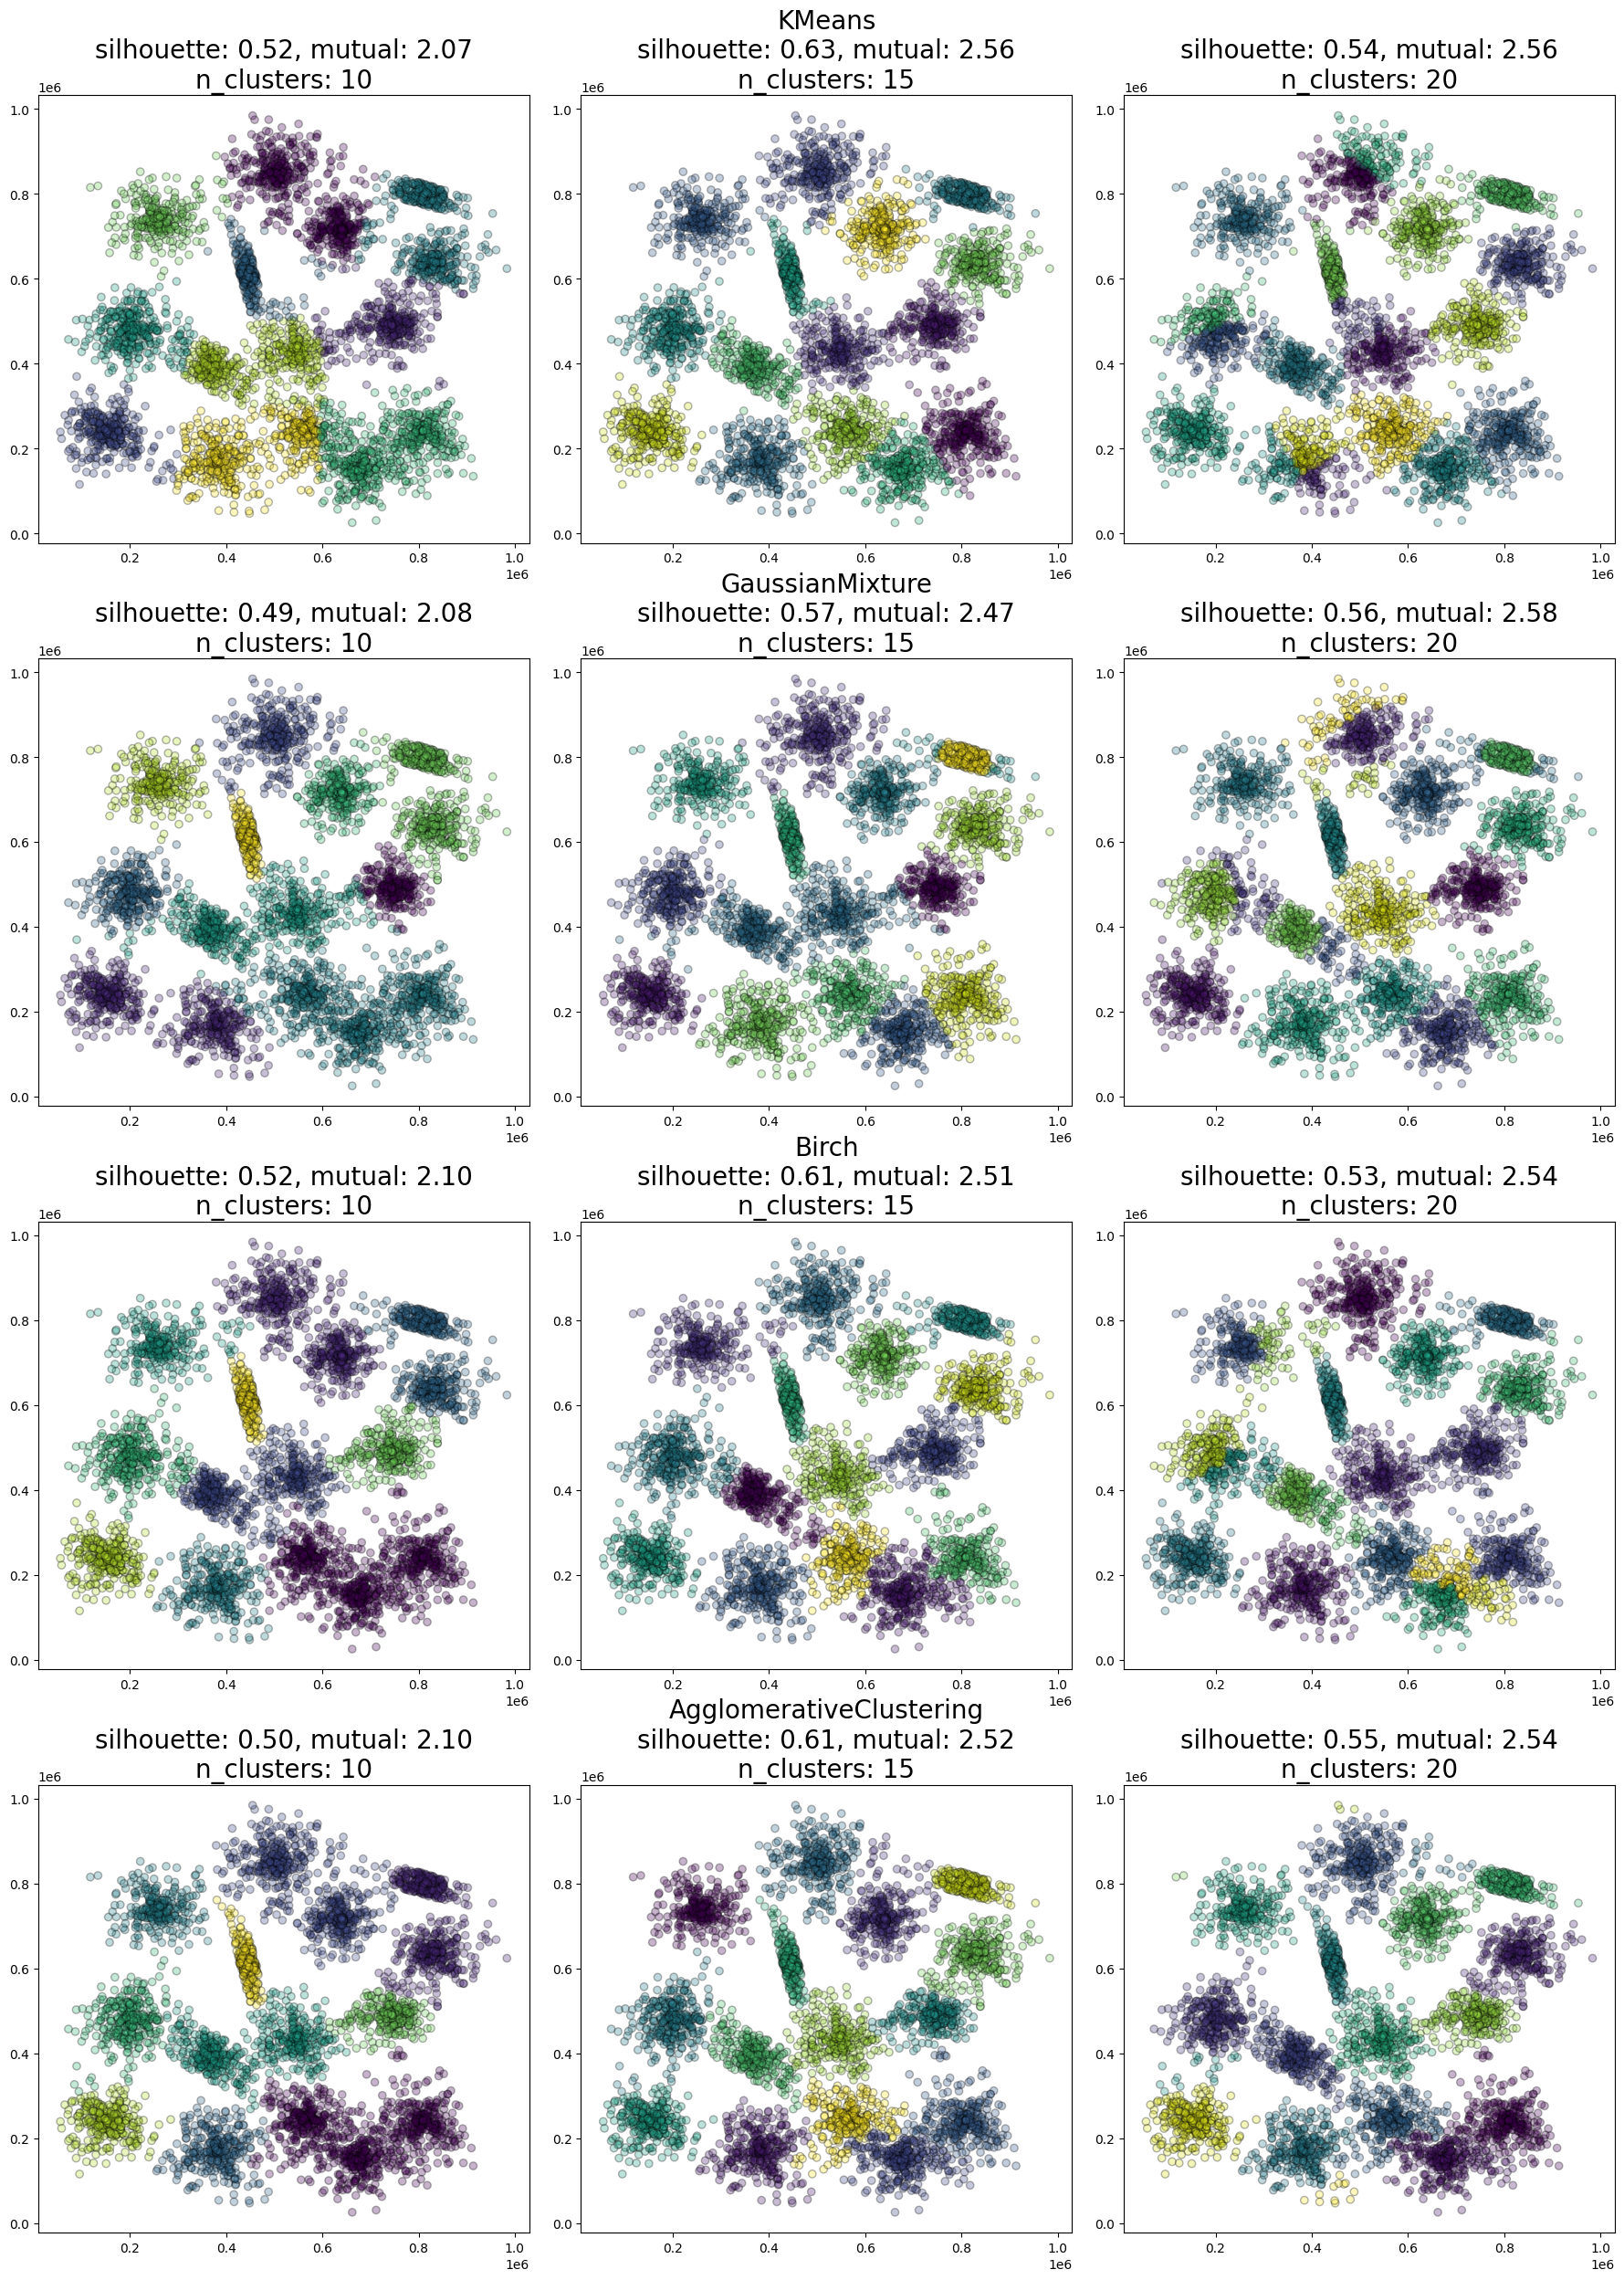

In [41]:
## BEGIN SOLUTION (do not delete this comment!)

cluster_numbers = [10, 15, 20] # clusters
models = ['KMeans', 'GaussianMixture', 'Birch', 'AgglomerativeClustering']

preds = []
# create set of models
for n_clusters in (cluster_numbers):
    preds_current = []
    km = KMeans(n_clusters = n_clusters, n_jobs=-1, random_state = 0, n_init = 4, init = 'random')
    gm = GaussianMixture(n_components = n_clusters, random_state = 0, covariance_type='full', reg_covar = 1e-07)
    br = Birch(n_clusters = n_clusters, copy = False, branching_factor = 4, threshold = 0.1)
    ac = AgglomerativeClustering(n_clusters = n_clusters, linkage="average",affinity='euclidean')
    km.fit(points)
    gm.fit(points)
    br.fit(points)
    ac.fit(points)
    preds_current.append([km.labels_,
                          gm.predict(points),
                          br.labels_,
                          ac.labels_])
    preds.append(preds_current)

fig, subplot = plt.subplots(4, 3, figsize=(18, 24)) # create subplots 4*3 items
fig.tight_layout(w_pad = 1.0, h_pad = 7.0) # set pad

# horizontal index, set number, cluster number
for i, clusters in zip(range(3), cluster_numbers):
    pred1 = preds[i]
    # vertical index, current model, it's name
    for j, name in zip(range(4), models):
        pred2 = pred1[0][j]
        SIL = silhouette_score(points, pred2) # calculate silhouette_score
        MI = mutual_info_score(labels, pred2) # calculate mutual_info_score

        subplot[j][i].scatter(points[:,0], points[:,1], c = pred2, alpha=0.3, edgecolor='k')
        if i !=1:
            subplot[j][i].set_title(f'silhouette: {SIL:.2f}, mutual: {MI:.2f}\nn_clusters: {clusters:.0f}', fontsize=20)
        else:
            subplot[j][i].set_title(f'{name}\nsilhouette: {SIL:.2f}, mutual: {MI:.2f}\nn_clusters: {clusters:.0f}', fontsize=20)

### END SOLUTION (do not delete this comment!)

3) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


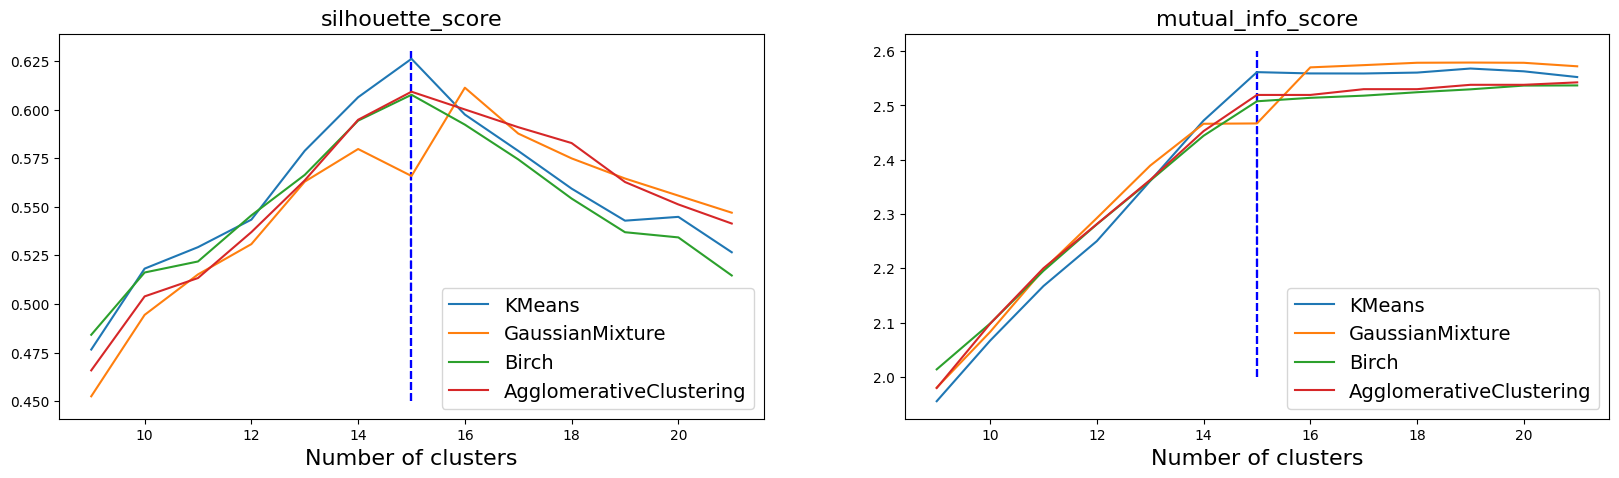

In [42]:
### BEGIN SOLUTION (do not delete this comment!)

n_clusters_space = list(map(int, np.linspace(9, 21, 13))) # clusters range

current_models = [KMeans(), GaussianMixture(covariance_type='full'), 
          Birch(branching_factor = 2, threshold = 15),
          AgglomerativeClustering(linkage="average",affinity='euclidean')]

fig, subplot = plt.subplots(1, 2, figsize=(20, 5))
for i, model in enumerate(current_models):
    # create a list for current model scores
    current_SIL, current_MI = [], [] 
    for n_clusters in (n_clusters_space):
        if i == 0: # KMeans
            model.set_params(n_clusters = n_clusters, n_jobs=-1, random_state = 0, n_init = 4, init = 'random')
        elif i == 1: # GaussianMixture
            model.set_params(n_components = n_clusters, random_state = 0, covariance_type='full', reg_covar = 1e-07)
        elif i == 2: # Birch
            model.set_params(n_clusters = n_clusters, copy = False, branching_factor = 4, threshold = 0.1)
        elif i == 3: # AgglomerativeClustering
            model.set_params(n_clusters = n_clusters, linkage="average",affinity='euclidean')

        # make predictions
        preds = model.fit_predict(points)

        SIL = silhouette_score(points, preds) # calculate silhouette_score
        MI = mutual_info_score(labels, preds) # calculate mutual_info_score

        # save scores
        current_SIL.append(SIL)
        current_MI.append(MI)

    subplot[0].set_title('silhouette_score', fontsize=16)
    subplot[1].set_title('mutual_info_score', fontsize=16)
    subplot[0].set_xlabel('Number of clusters', fontsize=16)
    subplot[1].set_xlabel('Number of clusters', fontsize=16)

    # plot vertical lines
    subplot[0].vlines(15, 0.45, 0.63, color = 'b', linestyle = '--')
    subplot[1].vlines(15, 2, 2.6, color = 'b', linestyle = '--')

    # plot graphs
    subplot[0].plot(n_clusters_space, current_SIL, label = models[i])
    subplot[1].plot(n_clusters_space, current_MI, label = models[i])

    # plot legends
    subplot[0].legend(fontsize=16, loc='lower right', prop={'size': 14})
    subplot[1].legend(fontsize=16, loc='lower right', prop={'size': 14})


### END SOLUTION (do not delete this comment!)

### Task 4.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [43]:
### BEGIN SOLUTION (do not delete this comment!)

import scipy

samples = 50
mean_, var_ = [], []
kmeans = KMeans(n_jobs=-1)
n_clusters_space = list(map(int, np.linspace(10, 20, 11)))

# for each cluster number
for n_clusters in (n_clusters_space):
    SIL_scores = []
    clr = KMeans(n_clusters = n_clusters, n_jobs=-1, random_state = 0)
    for i in range(samples):
        data_index = np.random.choice(points.shape[0], points.shape[0], replace=True)
        preds = clr.fit_predict(points[data_index]) # make predictions
        SIL = silhouette_score(points[data_index], preds) # calculate score
        SIL_scores.append(SIL) # add scores into list

    # calculate mean val for current n_clusters
    mean_.append(np.mean(SIL_scores))
    # calculate var val for current n_clusters
    var_.append(np.var(SIL_scores))

# calculate interval
interval = scipy.stats.norm(mean_, np.sqrt(np.array(var_))).interval(0.95)

### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

No handles with labels found to put in legend.


Number of clusters: 10
        Variance: 3.931174418200187e-05
        Confidence interval: [0.5062774483904864, 0.5308550354522645]
Number of clusters: 11
        Variance: 4.4388765821083065e-05
        Confidence interval: [0.5240120834144716, 0.5501285621972728]
Number of clusters: 12
        Variance: 2.565941909235943e-05
        Confidence interval: [0.5497222704082867, 0.5695787153878122]
Number of clusters: 13
        Variance: 3.880353993627329e-05
        Confidence interval: [0.5723515848171099, 0.5967697912018839]
Number of clusters: 14
        Variance: 1.5352528455672313e-05
        Confidence interval: [0.6045703997600286, 0.6199295801881634]
Number of clusters: 15
        Variance: 1.0060828547318344e-05
        Confidence interval: [0.6205197691377831, 0.6329533138562593]
Number of clusters: 16
        Variance: 2.184340114278375e-05
        Confidence interval: [0.600859585781378, 0.6191801235457458]
Number of clusters: 17
        Variance: 4.047259339667072e-05
    

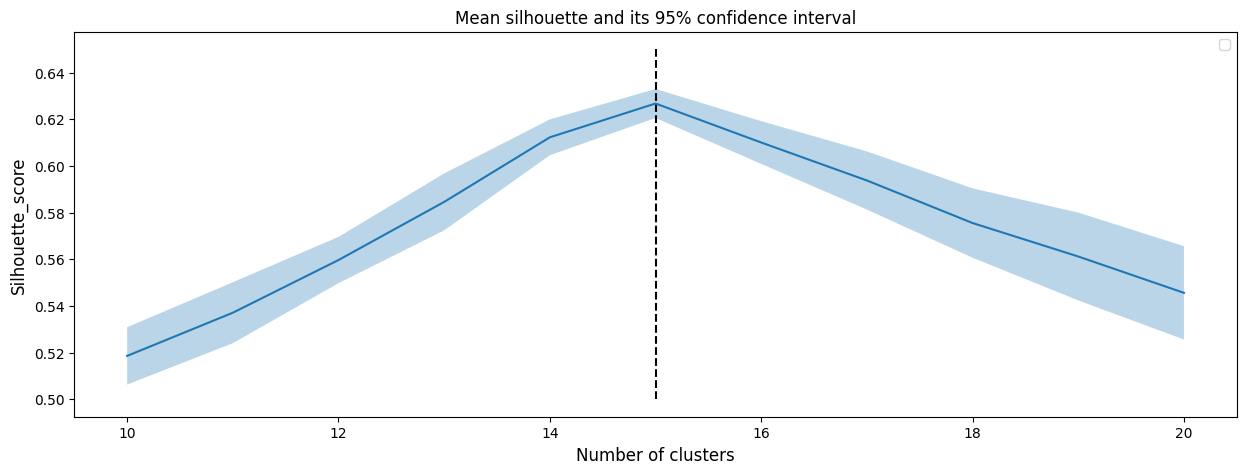

In [44]:
### BEGIN SOLUTION (do not delete this comment!)

for i, n_clusters in zip(range(len(n_clusters_space)), n_clusters_space):
    print('Number of clusters:', str(n_clusters))
    print('        Variance:', str(var_[i]))
    print('        Confidence interval:', str([interval[0][i],interval[1][i]]))

plt.figure(figsize=(15,5))
plt.vlines(15, 0.5, 0.65, color = 'black', linestyle = '--')
plt.title('Mean silhouette and its 95% confidence interval', fontsize=12)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Silhouette_score', fontsize=12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.plot(n_clusters_space, mean_)
plt.fill_between(n_clusters_space, *interval, alpha=0.3)
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

## Task 5. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 5.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [45]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('./creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [46]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data

# replace lables (for anomaly detection)

test_y = test_y.replace({1 : -1, 0 : 1})
ones = len(test_y[test_y == 1])
minus_ones = len(test_y[test_y == -1])
contamination = minus_ones / ones

### END SOLUTION (do not delete this comment!)

In [47]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

for i in [0.1, 1, 10]:
    
    names = ['IsolationForest',
             'LocalOutlierFactor',
             'EllipticEnvelope']
    detectors = [IsolationForest(contamination = contamination * i, n_jobs=-1, random_state=0, bootstrap=True),
                 LocalOutlierFactor(contamination = contamination * i, novelty = True, n_jobs=-1),
                 EllipticEnvelope(contamination = contamination * i, support_fraction = 1, random_state=0, assume_centered=True)]

    for j, anomaly_detector in zip(range(3), detectors):
        anomaly_detector.fit(train_X)
        labels_isolation = anomaly_detector.predict(test_X)
        print(names[j] + ': Contamination: ', np.round(contamination * i, 3), ' ', 
              'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
              'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))
    
### END SOLUTION (do not delete this comment!)

IsolationForest: Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.984
LocalOutlierFactor: Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
EllipticEnvelope: Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.983
IsolationForest: Contamination:  0.017   ROC/AUC:  0.783 Precision:  0.987
LocalOutlierFactor: Contamination:  0.017   ROC/AUC:  0.499 Precision:  0.961
EllipticEnvelope: Contamination:  0.017   ROC/AUC:  0.773 Precision:  0.987
IsolationForest: Contamination:  0.172   ROC/AUC:  0.842 Precision:  0.847
LocalOutlierFactor: Contamination:  0.172   ROC/AUC:  0.513 Precision:  0.812
EllipticEnvelope: Contamination:  0.172   ROC/AUC:  0.861 Precision:  0.845


### Task 5.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [48]:
from sklearn.neighbors import NearestNeighbors
>>> neigh = NearestNeighbors(n_neighbors=1)

In [49]:
### BEGIN SOLUTION (do not delete this comment!)

# your favorite classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    # create classifier
    clf = GaussianNB()
    
    # fit classifier on the train (replace test_y values since predictions have values 0,1)
    clf.fit(test_X.iloc[train_index], test_y.iloc[train_index])

    # make predictions on the test
    preds = clf.predict(test_X.iloc[test_index])

    # calc precision and recall (replace test_y values since predictions have values 0,1)
    roc_current = roc_auc_score(test_y.iloc[test_index], preds)
    pr_current = precision_score(test_y.iloc[test_index], preds)
    # save metrics
    roc_auc_scores.append(roc_current)
    pr_score.append(pr_current)
    
### END SOLUTION (do not delete this comment!)

print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.8430664689893748 std:  0.10595378482940625
Precision mean:  0.9947465532589245 std:  0.0035787618966353707


In [63]:
### BEGIN SOLUTION (do not delete this comment!)

detectors = [
             IsolationForest(contamination = contamination, n_jobs=-1, random_state=42, bootstrap=True),
            LocalOutlierFactor(contamination = contamination, novelty = True, n_jobs=-1),
            EllipticEnvelope(contamination = contamination, support_fraction = 1, random_state=42, assume_centered=True)
            ]

# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):

    anomaly_preds = np.zeros(len(test_index), dtype=int)
    test = test_X.iloc[test_index]

    clf = GaussianNB() # replace to work with 0,1 values
    clf.fit(test_X.iloc[train_index], test_y.replace({-1 : 1, 1 : 0}).iloc[train_index])
    clf_preds = clf.predict(test)

    data = pd.concat([train_X, test_X.iloc[train_index]], axis=0)

    detectors[0].fit(data) # IsolationForest
    pred = detectors[0].predict(test)
    anomaly_preds = anomaly_preds | pred

    detectors[1].fit(data) # LocalOutlierFactor
    pred = detectors[1].predict(test)
    anomaly_preds = anomaly_preds | pred

    detectors[2].fit(data) # EllipticEnvelope
    pred = detectors[2].predict(test)
    anomaly_preds = anomaly_preds | pred

    # merge predictions
    preds = clf_preds & anomaly_preds
    test_lables = test_y.replace({-1 : 1, 1 : 0}).iloc[test_index]

    # calculate metrics
    roc = roc_auc_score(test_lables, preds)
    prec = precision_score(test_lables, preds, average = 'micro')
    roc_auc_scores.append(roc)
    pr_score.append(prec)
    
### END SOLUTION (do not delete this comment!)
    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.843066468989375 std:  0.10595378482940625
Precision mean:  0.9910153919580003 std:  0.005162845091772125


* My favorite classifier - GaussianNB. So I have used it without anomaly detection and with it. I have not achieved increasing in perfomance and got almost exactly same result as without it. Probably it is because GaussianNB learns classify data quit well. So anomaly detection method does not provide imporovement.